<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Business Understanding</a></span></li><li><span><a href="#Data-Understanding" data-toc-modified-id="Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Understanding</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Preprocessing-Class" data-toc-modified-id="Preprocessing-Class-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preprocessing Class</a></span></li><li><span><a href="#Bounding-Box-Detection" data-toc-modified-id="Bounding-Box-Detection-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Bounding Box Detection</a></span><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Network" data-toc-modified-id="Convolutional-Neural-Network-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Convolutional Neural Network</a></span></li><li><span><a href="#MobileNet" data-toc-modified-id="MobileNet-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>MobileNet</a></span></li><li><span><a href="#MobileNet-Small" data-toc-modified-id="MobileNet-Small-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>MobileNet Small</a></span></li><li><span><a href="#VGG16" data-toc-modified-id="VGG16-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>VGG16</a></span></li></ul></li><li><span><a href="#Context-and-Body-Detections" data-toc-modified-id="Context-and-Body-Detections-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Context and Body Detections</a></span><ul class="toc-item"><li><span><a href="#Convolutional-Neural-Network" data-toc-modified-id="Convolutional-Neural-Network-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Convolutional Neural Network</a></span></li><li><span><a href="#VGG16" data-toc-modified-id="VGG16-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>VGG16</a></span></li><li><span><a href="#VGG19" data-toc-modified-id="VGG19-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>VGG19</a></span></li><li><span><a href="#Residual-Network" data-toc-modified-id="Residual-Network-4.3.4"><span class="toc-item-num">4.3.4&nbsp;&nbsp;</span>Residual Network</a></span></li><li><span><a href="#Inception" data-toc-modified-id="Inception-4.3.5"><span class="toc-item-num">4.3.5&nbsp;&nbsp;</span>Inception</a></span></li><li><span><a href="#Xception" data-toc-modified-id="Xception-4.3.6"><span class="toc-item-num">4.3.6&nbsp;&nbsp;</span>Xception</a></span></li></ul></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Evaluation</a></span><ul class="toc-item"><li><span><a href="#Model-Performances" data-toc-modified-id="Model-Performances-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Model Performances</a></span></li><li><span><a href="#Final-Model" data-toc-modified-id="Final-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Final Model</a></span></li><li><span><a href="#Live-Emotion-Annotation" data-toc-modified-id="Live-Emotion-Annotation-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Live Emotion Annotation</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></div>

# Business Understanding

Say something about chatbots and how they are only limited to speech with no visuals. 

The pandemic has had its effects on peoples ability to 

# Data Understanding

# Data Preparation

The project depends on the following libraries to function. Users are advised to uncomment the following section to install the libraries.

In [181]:
######## Uncomment to install libraries ############
# ! pip install eli5
# ! pip install tensorbay

In [18]:
import json
from tensorbay import GAS
from tensorbay.dataset import Dataset
import numpy as np
from PIL import Image
import cv2
from tqdm import tqdm
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import models, layers, optimizers
from tensorflow.keras.applications import MobileNetV2, MobileNetV3Small,\
VGG16, VGG19, ResNet50V2, Xception, InceptionV3

In [4]:
def cat_to_one_hot(y_cat):
    cat2ind = {'Affection': 0, 'Anger': 1, 'Annoyance': 2, 'Anticipation': 3,
               'Aversion': 4, 'Confidence': 5, 'Disapproval': 6, 
               'Disconnection': 7, 'Disquietment': 8, 'Doubt/Confusion': 9,
               'Embarrassment': 10, 'Engagement': 11, 'Esteem': 12, 
               'Excitement': 13, 'Fatigue': 14, 'Fear': 15, 'Happiness': 16,
               'Pain': 17, 'Peace': 18, 'Pleasure': 19, 'Sadness': 20,
               'Sensitivity': 21, 'Suffering': 22, 'Surprise': 23, 
               'Sympathy': 24, 'Yearning': 25}
    one_hot_cat = np.zeros(26)
    for em in y_cat:
        one_hot_cat[cat2ind[em]] = 1
    return one_hot_cat

In [5]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)
keys = get_keys("/Users/zeaps/.secret/tensorbay_api.json")

api_key = keys['api_key']

In [25]:
save_dir = './data/emotic_pre'
dataset = Dataset("Emotic", GAS(api_key))
segments = dataset.keys()
if not os.path.exists(save_dir):
    os.makedirs(save_dir)    
for seg in ['test', 'val', 'train']:
    if not os.path.exists()
    segment = dataset[seg]
    box_context, context_arr, body_arr, cat_arr, cont_arr, bounding_box = [], [], [], [], [], []
    for i, data in enumerate(tqdm(segment)):
        with data.open() as fp:
            context = Image.open(fp).convert('RGB')
        context = np.asarray(context)
        context_cv = cv2.resize(context, (224, 224))
        mask = np.zeros(context_cv.shape[:2])
        for label_box2d in data.label.box2d:
            xmin = label_box2d.xmin
            ymin = label_box2d.ymin
            xmax = label_box2d.xmax
            ymax = label_box2d.ymax            
            body = context[ymin:ymax, xmin:xmax]
            body_cv = cv2.resize(body, (128, 128))
            box_dims = [ymin/context.shape[0], ymax/context.shape[0],
                       xmin/context.shape[1], xmax/context.shape[1]]
            context_arr.append(context_cv)
            body_arr.append(body_cv)
            cont_arr.append(np.array([int(label_box2d.attributes['valence']), 
                                      int(label_box2d.attributes['arousal']), 
                                      int(label_box2d.attributes['dominance'])]))
            cat = cat_to_one_hot(label_box2d.attributes['categories'])
            cat_arr.append(np.array(cat))
        box_context.append(context_cv)
        bounding_box.append(box_dims)
    box_context = np.array(box_context)
    context_arr = np.array(context_arr)
    body_arr = np.array(body_arr)
    cat_arr = np.array(cat_arr)
    cont_arr = np.array(cont_arr)
    bounding_box = np.array(bounding_box)
    np.save(os.path.join(save_dir, '%s_box_context.npy' % (seg)), box_context)
    np.save(os.path.join(save_dir, '%s_context_arr.npy' % (seg)), context_arr)
    np.save(os.path.join(save_dir, '%s_body_arr.npy' % (seg)), body_arr)
    np.save(os.path.join(save_dir, '%s_cat_arr.npy' % (seg)), cat_arr)
    np.save(os.path.join(save_dir, '%s_cont_arr.npy' % (seg)), cont_arr)
    np.save(os.path.join(save_dir, '%s_bounding_box.npy' % (seg)), bounding_box)

 76%|███████▌  | 12882/16981 [31:53<11:02,  6.19it/s] C:\Users\zeaps\Anaconda3\envs\learn-env\lib\site-packages\PIL\TiffImagePlugin.py:792: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
100%|██████████| 16981/16981 [49:52<00:00,  5.67it/s]


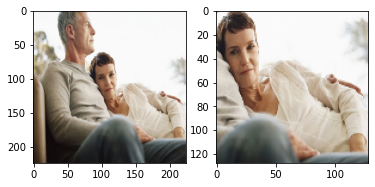

In [33]:
plt.subplot(121)
plt.imshow(context_arr[0])
# plt.axes('off')
plt.subplot(122)
plt.imshow(body_arr[0]);
# plt.axes('off')

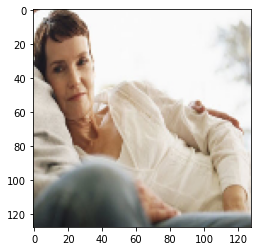

In [23]:
plt.imshow(body_arr[0]);

# Modeling 

## Preprocessing Class

## Bounding Box Detection

Create a bounding box detection here.

### Convolutional Neural Network

### MobileNet

### MobileNet Small

### VGG16

## Context and Body Detections

Create siamese network class here 

### Convolutional Neural Network

### VGG16

### VGG19

### Residual Network

### Inception

### Xception

# Evaluation 

## Model Performances

## Final Model

## Live Emotion Annotation 

# Conclusion 

# Next Steps